# Dataset Analysis

## Meters


In [1]:
from collections import Counter
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

df_dataset = pd.read_csv('../resources/dataset_index.csv', sep=';', encoding="latin1")

print("Number of meters: {0}".format(df_dataset.shape[0]))
print("Variables: {0}".format(df_dataset.columns))

Number of meters: 219
Variables: Index(['meter_id', 'tariff', 'n_phases', 'ctrct_pw'], dtype='object')


### Tariff
###### The tariff variable has errors, some of the values have a whitespace in the end and others don't! 


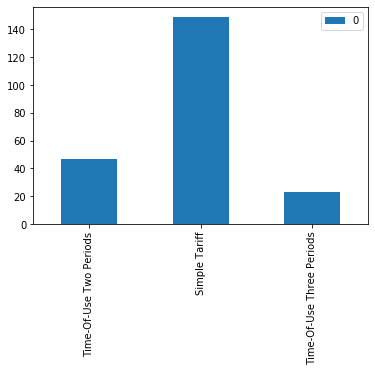

In [2]:
%matplotlib inline
tariff_cleaned = [el.strip() for el in df_dataset.tariff]
tariff_counter = Counter(tariff_cleaned)
df = pd.DataFrame.from_dict(tariff_counter, orient='index')
tariff_counter_hist = df.plot(kind='bar')


### Phase

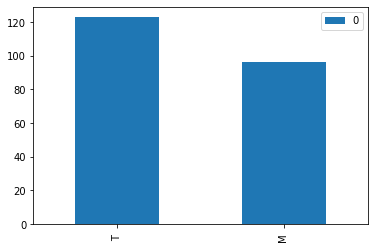

In [3]:
df = pd.DataFrame.from_dict(Counter(df_dataset.n_phases), orient='index')
hist_n_phases = df.plot(kind='bar')


### Contracted Power


,meter_id,tariff,n_phases,ctrct_pw
216,meter_216,Simple Tariff,T,13.8


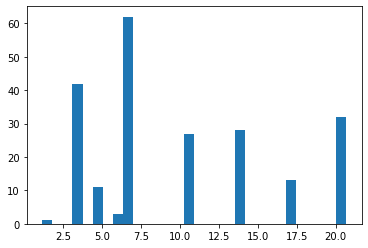

In [159]:
plt.hist(df_dataset.ctrct_pw, bins=30)
df_dataset.loc[df_dataset.ctrct_pw < 3]
df_dataset.loc[df_dataset.meter_id == 'meter_216']

## Power


In [5]:
df_power = pd.read_csv('../resources/load_pwr.csv', sep=';', parse_dates=['Time']).set_index('Time').drop(columns=['Unnamed: 0'])

In [88]:
np.nanpercentile(df_power['meter_0'], 95)

4664.0

In [16]:
df_contract = df_dataset.set_index('meter_id')

In [123]:
df_meter_stats = pd.DataFrame(df_power.mean()).join(df_contract.ctrct_pw*1000).rename(columns={0: 'mean_value'})
df_meter_stats = df_meter_stats.join(pd.DataFrame(df_power.max())).rename(columns={0: 'max_value'})
df_meter_stats['per_99'] = df_power.apply(lambda x: np.nanpercentile(x, 99))
df_meter_stats.head()

,mean_value,ctrct_pw,max_value,per_99
meter_0,1688.141342,20700.0,12284.0,6372.00
meter_1,848.662984,20700.0,7576.0,3193.56
meter_2,283.509913,4600.0,5436.0,2600.00
meter_3,338.758359,3450.0,4168.0,1780.00
meter_4,294.952321,6900.0,4744.0,2161.96


In [148]:
for i in set(df_meter_stats.ctrct_pw):
    print(i)

17250.0
13800.0
10350.0
6900.0
5750.0
4600.0
3450.0
20700.0


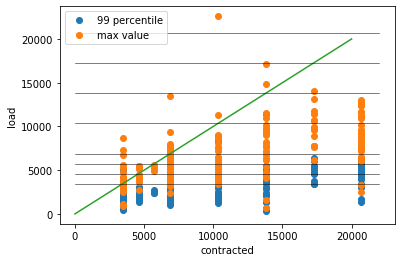

In [137]:
#plt.plot(df_meter_stats.ctrct_pw, df_meter_stats.mean_value, 'o', label='mean')
plt.plot(df_meter_stats.ctrct_pw, df_meter_stats.per_99, 'o', label='99 percentile')
plt.plot(df_meter_stats.ctrct_pw, df_meter_stats.max_value, 'o', label='max value')
plt.legend()
plt.ylabel('load')
plt.xlabel('contracted')
plt.plot([0, 20000], [0, 20000])
for i in set(df_meter_stats.ctrct_pw):
    plt.plot([0, 22000], [i, i], 'k', lw='0.5')
    

In [ ]:
df_pv = pd.read_csv('../resources/pv_pwr.csv', parse_dates=['Date'], sep=';').set_index('Date')

In [ ]:
df_pv.head()

In [ ]:
df_pv.loc[df_pv.index < "2016-10-20"].plot()

In [142]:
df_power.head()

,meter_0,meter_1,meter_2,meter_3,meter_4,meter_5,meter_6,meter_7,meter_8,meter_9,...,meter_206,meter_207,meter_208,meter_209,meter_210,meter_211,meter_212,meter_213,meter_214,meter_215
Time,,,,,,,,,,,,,,,,,,,,,
2016-10-01 00:15:00,1076.0,404.0,76.0,148.0,284.0,220.0,332.0,144.0,1888.0,1008.0,...,0.0,264.0,604.0,316.0,112.0,208.0,1044.0,76.0,1320.0,124.0
2016-10-01 00:30:00,1064.0,440.0,56.0,116.0,236.0,164.0,328.0,216.0,1828.0,1060.0,...,0.0,272.0,536.0,248.0,64.0,188.0,1068.0,40.0,1316.0,184.0
2016-10-01 00:45:00,1036.0,484.0,136.0,20.0,236.0,168.0,356.0,100.0,1696.0,848.0,...,0.0,268.0,660.0,192.0,136.0,144.0,1164.0,44.0,1284.0,212.0
2016-10-01 01:00:00,1504.0,580.0,56.0,84.0,196.0,164.0,364.0,36.0,1692.0,864.0,...,0.0,272.0,664.0,176.0,68.0,144.0,1016.0,40.0,1380.0,156.0
2016-10-01 01:15:00,3236.0,488.0,68.0,252.0,164.0,84.0,440.0,52.0,1832.0,836.0,...,0.0,276.0,648.0,152.0,104.0,212.0,1016.0,40.0,1500.0,124.0


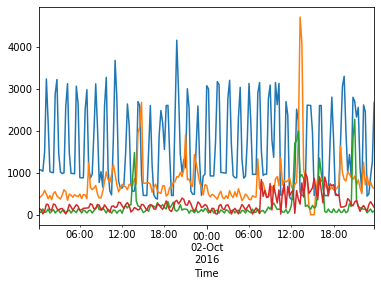

In [147]:
for i in range(4):
    df_power['meter_{}'.format(i)].loc[df_power.index < '2016-10-03'].plot()

In [155]:
df_power

,meter_0,meter_1,meter_2,meter_3,meter_4,meter_5,meter_6,meter_7,meter_8,meter_9,...,meter_206,meter_207,meter_208,meter_209,meter_210,meter_211,meter_212,meter_213,meter_214,meter_215
Time,,,,,,,,,,,,,,,,,,,,,
2016-10-01 00:15:00,1076.0,404.0,76.0,148.0,284.0,220.0,332.0,144.0,1888.0,1008.0,...,0.0,264.0,604.0,316.0,112.0,208.0,1044.0,76.0,1320.0,124.0
2016-10-01 00:30:00,1064.0,440.0,56.0,116.0,236.0,164.0,328.0,216.0,1828.0,1060.0,...,0.0,272.0,536.0,248.0,64.0,188.0,1068.0,40.0,1316.0,184.0
2016-10-01 00:45:00,1036.0,484.0,136.0,20.0,236.0,168.0,356.0,100.0,1696.0,848.0,...,0.0,268.0,660.0,192.0,136.0,144.0,1164.0,44.0,1284.0,212.0
2016-10-01 01:00:00,1504.0,580.0,56.0,84.0,196.0,164.0,364.0,36.0,1692.0,864.0,...,0.0,272.0,664.0,176.0,68.0,144.0,1016.0,40.0,1380.0,156.0
2016-10-01 01:15:00,3236.0,488.0,68.0,252.0,164.0,84.0,440.0,52.0,1832.0,836.0,...,0.0,276.0,648.0,152.0,104.0,212.0,1016.0,40.0,1500.0,124.0
2016-10-01 01:30:00,2208.0,384.0,136.0,240.0,160.0,96.0,432.0,152.0,1848.0,792.0,...,0.0,320.0,592.0,68.0,116.0,92.0,1160.0,52.0,744.0,124.0
2016-10-01 01:45:00,1028.0,456.0,40.0,116.0,156.0,180.0,424.0,216.0,1784.0,928.0,...,0.0,272.0,668.0,140.0,64.0,92.0,1028.0,128.0,664.0,216.0
2016-10-01 02:00:00,1008.0,356.0,80.0,108.0,124.0,204.0,424.0,156.0,1756.0,972.0,...,0.0,396.0,668.0,172.0,132.0,148.0,1012.0,124.0,604.0,200.0
2016-10-01 02:15:00,1004.0,504.0,120.0,256.0,96.0,184.0,284.0,36.0,1864.0,1020.0,...,0.0,280.0,580.0,160.0,72.0,224.0,1232.0,100.0,668.0,144.0
